In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

In [3]:
df = pd.read_csv('dataPersonality.csv')

In [90]:
#Olhando para os dados
print("Head dos dados")
print(df.head())
print("Descrição dos dados")
print(df.describe())
print("Valores Nulos")
print(df.isnull().sum())
print("Valores NA")
print(df.isna().sum())
df_duplicatedColumns = df.loc[df.duplicated() == True]
print("Valores duplicados")
print(df_duplicatedColumns. head())

Head dos dados
    Age  Gender  Education  Introversion Score  Sensing Score  Thinking Score  \
0  19.0    Male          0             9.47080       7.141434         6.03696   
1  27.0  Female          0             5.85392       6.160195         0.80552   
2  21.0  Female          0             7.08615       3.388433         2.66188   
3  28.0    Male          0             2.01892       4.823624         7.30625   
4  36.0  Female          1             9.91703       4.755080         5.31469   

   Judging Score    Interest Personality  
0       4.360278     Unknown        ENFP  
1       4.221421      Sports        ESFP  
2       5.127320     Unknown        ENFP  
3       5.986550      Others        INTP  
4       4.677213  Technology        ENFP  
Descrição dos dados
                 Age      Education  Introversion Score  Sensing Score  \
count  128061.000000  128061.000000       128061.000000  128061.000000   
mean       26.349091       0.411156            4.996387       5.081893  

In [ ]:
#Entendendo quantidade de dados e quais dados das colunas Interest e Personality  
print(df["Interest"].value_counts())
print((df['Personality'].value_counts(normalize=True)* 100))
categorical_columns = ['Interest', 'Personality']
for column in categorical_columns:
    counts = df[column].value_counts()
    
    # Plotar o gráfico de pizza
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Distribuição das categorias em {column}')
    plt.show()

In [4]:
#Acima é possível perceber um grande desbalancemaneto dos dados, para isso, vou buscar treinar tres modelos, um para prever os dados que 
# tem mais quantidade, um para o de menores e um terceiro que una a saída ou utilizar a probabilidade da saída dos outros dois para prever os dados

perdonality_Big = ["ENFP", "ENTP", "INFP", "INTP"]
perdonality_Small = ["ESFP", "ENFJ", "ISFP", "ESTP", "INFJ", "ENTJ", "ISTP", "INTJ", "ESFJ", "ESTJ", "ISFJ", "ISTJ"]
index_big = df.index[df['Personality'].isin(perdonality_Big)].tolist()
index_small = df.index[df['Personality'].isin(perdonality_Small)].tolist()


# Definindo as colunas
continuous_cols = ["Age", "Introversion Score", "Sensing Score", "Thinking Score", "Judging Score"]
categorical_cols = ["Gender","Interest"]
others_cols = ["Education"]
y_target = ["Personality"]

le_gender = LabelEncoder()
le_interest = LabelEncoder()
le_y = LabelEncoder()
scaler = MinMaxScaler()


def preprocess_dataY(df):
    y_processed = pd.DataFrame()
    y_processed['Personality'] = le_y.fit_transform(df['Personality'])
    return y_processed

def preprocess_dataX(df):
    X_processed = pd.DataFrame()

    X_processed[categorical_cols[0]] = le_gender.fit_transform(df[categorical_cols[0]].values)
    X_processed[categorical_cols[1]] = le_interest.fit_transform(df[categorical_cols[1]].values)
    
    normalized_array = scaler.fit_transform(df[continuous_cols])
    X_processed[continuous_cols] = pd.DataFrame(normalized_array, columns=continuous_cols)
    
    X_processed[others_cols] = df[others_cols]
    
    return X_processed

y_processed = preprocess_dataY(df[y_target])
X_processed = preprocess_dataX(df)

print(X_processed.info())
print(y_processed.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Gender              128061 non-null  int32  
 1   Interest            128061 non-null  int32  
 2   Age                 128061 non-null  float64
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Education           128061 non-null  int64  
dtypes: float64(5), int32(2), int64(1)
memory usage: 6.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Personality  128061 non-null  int32
dtypes: int32(1)
memory usage: 500.4 KB
None


In [5]:
#ajustando os index para dividir os dados em Big e Small apos o ajuste e normalização dos dados
X_processed_Big = X_processed.iloc[index_big]
y_processed_Big = y_processed.iloc[index_big]

X_processed_Small = X_processed.iloc[index_small]
y_processed_Small = y_processed.iloc[index_small]

In [ ]:
X_processed_Big.hist()
plt.figure(figsize = (20,20))
sns.heatmap(data = X_processed_Big.corr(),annot = True,linewidths=.5,annot_kws={"size": 15})
plt.show()

In [ ]:
X_processed_Small.hist()
plt.figure(figsize = (20,20))
sns.heatmap(data = X_processed_Small.corr(),annot = True,linewidths=.5,annot_kws={"size": 15})
plt.show()

In [6]:
X_train_Big, X_test_Big, y_train_Big, y_test_Big = train_test_split(X_processed_Big, y_processed_Big, test_size=0.2, random_state=42)
X_train_Small, X_test_Small, y_train_Small, y_test_Small = train_test_split(X_processed_Small, y_processed_Small, test_size=0.2, random_state=42)

In [ ]:
#Iniciando Modelo de classificação Naive Bayes

gnb_Big = GaussianNB()
y_pred_nb_Big = gnb_Big.fit(X_train_Big, y_train_Big).predict(X_test_Big)
report_gnb_Big = classification_report(y_test_Big, y_pred_nb_Big, target_names=le_y.inverse_transform(y_train_Big["Personality"].unique()))

gnb_Small = GaussianNB()
y_pred_nb_Small = gnb_Small.fit(X_train_Small, y_train_Small).predict(X_test_Small)
report_gnb_Small = classification_report(y_test_Small, y_pred_nb_Small, target_names=le_y.inverse_transform(y_train_Small["Personality"].unique()))

print("Classification Report Naive Bayes Big:")
print(report_gnb_Big)

print("Classification Report Naive Bayes Small:")
print(report_gnb_Small)

In [8]:
#Iniciando Modelo de classificação Random Forest

# Definir os parâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_Big = RandomForestClassifier(random_state=42)
random_big = RandomizedSearchCV(rf_Big, param_distributions=param_grid, cv=5,n_iter=10, scoring='accuracy',n_jobs=-1)
random_big.fit(X_train_Big, y_train_Big)

rf_Small = RandomForestClassifier(random_state=42)
random_Small = RandomizedSearchCV(rf_Small, param_distributions=param_grid, cv=5,n_iter=10, scoring='accuracy',n_jobs=-1)
random_Small.fit(X_train_Small, y_train_Small)


C:\Users\RODRIGO GONÇALVES\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\RODRIGO GONÇALVES\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   scoring='accuracy')

In [19]:
def print_classification_report(y_test, targets, predicao):
    report_rf_Small = classification_report(y_test, predicao, target_names=targets)
    print("Classification Report Random Forest Small:")
    print(report_rf_Small)

def print_confusion_matrix( y_test, targets,predicao):
    matriz_rf_Small = confusion_matrix(y_test, predicao)
    labels_Small = targets

    # Plotar a matriz de confusão usando seaborn
    plt.figure(figsize=(10, 7))
    sns.heatmap(matriz_rf_Small, annot=True, fmt='g', cmap='Blues', xticklabels=labels_Small, yticklabels=labels_Small)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
def print_feature_importance(modelo, nameColums):
    feature_importance_rf_Small = modelo.feature_importances_

    # Plotar importância das features
    plt.figure(figsize=(10, 6))
    sorted_idx = np.argsort(feature_importance_rf_Small)[::-1]
    features = nameColums
    plt.barh(features[sorted_idx], feature_importance_rf_Small[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

def print_auc_curve(modelo, x_train, y_train, x_test, y_test):
    prob_predict_test = modelo.predict_proba(x_test)
    prob_predict_train = modelo.predict_proba(x_train)
    
    # Certifique-se de acessar corretamente a segunda coluna, que representa a probabilidade da classe positiva
    y_pred_probs_test = prob_predict_test[:, 1]  # Probabilidades da classe positiva
    y_pred_probs_train = prob_predict_train[:, 1]  # Probabilidades da classe positiva
    
    # Agora, calcule as métricas de AUC
    auc_test = roc_auc_score(y_test, y_pred_probs_test)
    auc_train = roc_auc_score(y_train, y_pred_probs_train)
    
    print(f'AUC Test: {auc_test:.4f}')
    print(f'AUC Train: {auc_train:.4f}')

    # Plotando a curva ROC
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_probs_test)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_probs_train)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_test, tpr_test, label=f'ROC Test (AUC = {auc_test:.4f})', color='blue')
    plt.plot(fpr_train, tpr_train, label=f'ROC Train (AUC = {auc_train:.4f})', color='green')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

def analise_dados_modelo(modelo, x_train, y_train, x_test, y_test, targets, nameColums):
    modelo.fit(x_train, y_train)
    predicao = modelo.predict(x_test)
    
    print_classification_report(y_test, targets, predicao)
    print_confusion_matrix( y_test, targets,predicao)
    print_feature_importance(modelo, nameColums)
    #print_auc_curve(modelo, x_train, y_train, x_test, y_test) APENAS PARA PROBLEMAS BINARIOS
    

Melhores Parâmetros Encontrados Big:
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}


C:\Users\RODRIGO GONÇALVES\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report Random Forest Small:
              precision    recall  f1-score   support

        ENFP       0.95      0.94      0.94      6780
        INFP       0.94      0.95      0.94      4986
        ENTP       0.92      0.93      0.92      4954
        INTP       0.93      0.91      0.92      3473

    accuracy                           0.94     20193
   macro avg       0.93      0.93      0.93     20193
weighted avg       0.94      0.94      0.94     20193



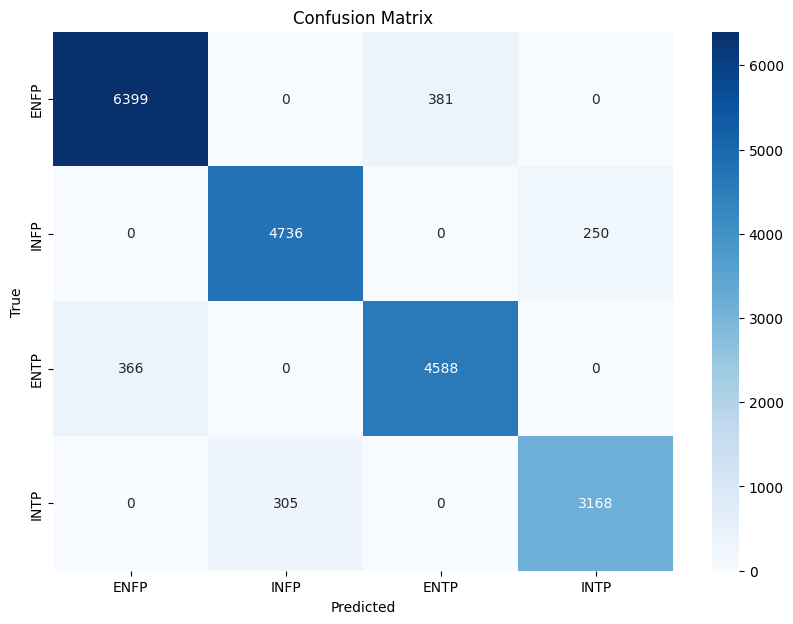

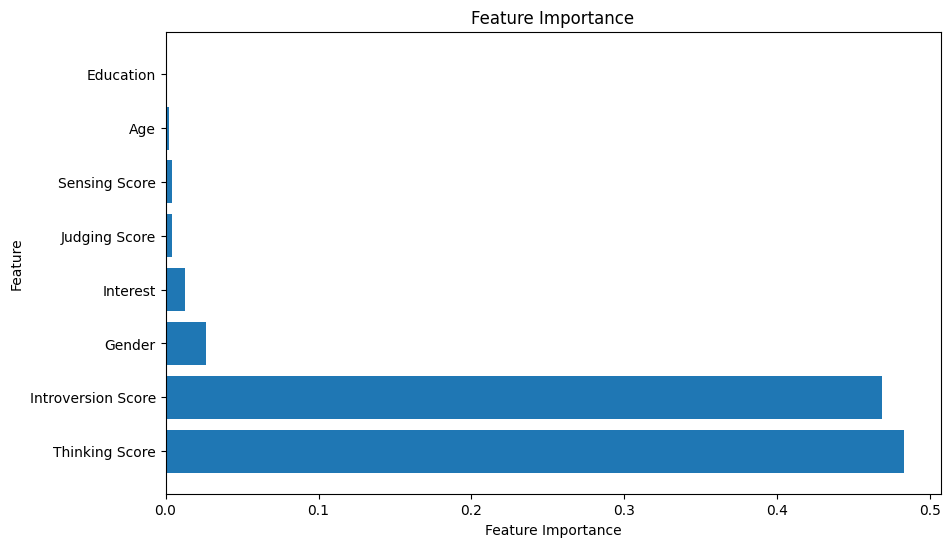

In [20]:
best_rf_classifier_Big = random_big.best_estimator_
print("Melhores Parâmetros Encontrados Big:")
print(random_big.best_params_)

analise_dados_modelo(best_rf_classifier_Big,
                     X_train_Big,
                     y_train_Big,
                     X_test_Big,
                     y_test_Big,
                     le_y.inverse_transform(y_train_Big["Personality"].unique()),
                     X_train_Big.columns)

Melhores Parâmetros Encontrados Small:
{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


C:\Users\RODRIGO GONÇALVES\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report Random Forest Small:
              precision    recall  f1-score   support

        ESFP       0.95      0.93      0.94       741
        ISFP       0.93      0.93      0.93       545
        ISFJ       0.83      0.85      0.84        98
        ESTP       0.93      0.94      0.93      1017
        INFJ       0.81      0.75      0.78        69
        ENFJ       0.94      0.92      0.93       696
        INTJ       0.93      0.92      0.92       592
        ISTJ       0.91      0.90      0.91       385
        ENTJ       0.75      0.78      0.76        68
        ISTP       0.90      0.92      0.91       689
        ESTJ       0.73      0.71      0.72        45
        ESFJ       0.89      0.93      0.91       475

    accuracy                           0.92      5420
   macro avg       0.87      0.87      0.87      5420
weighted avg       0.92      0.92      0.92      5420



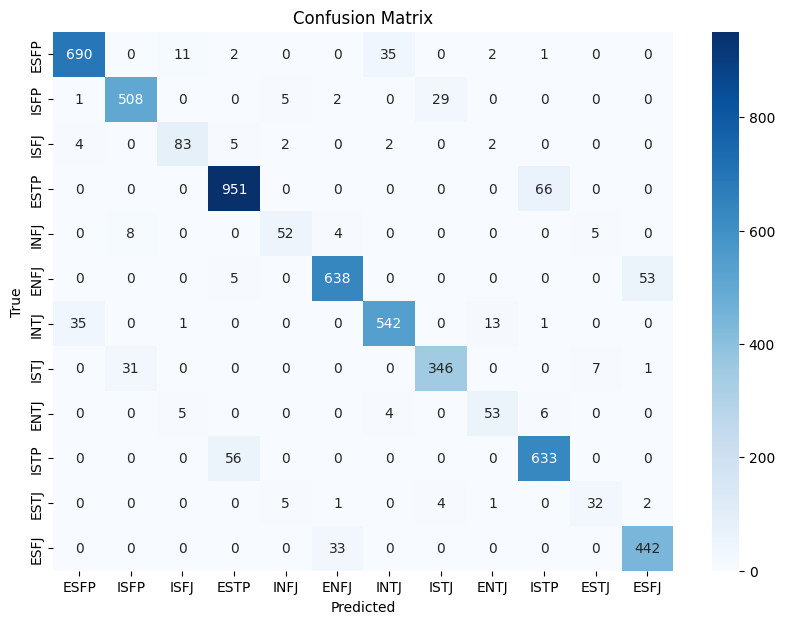

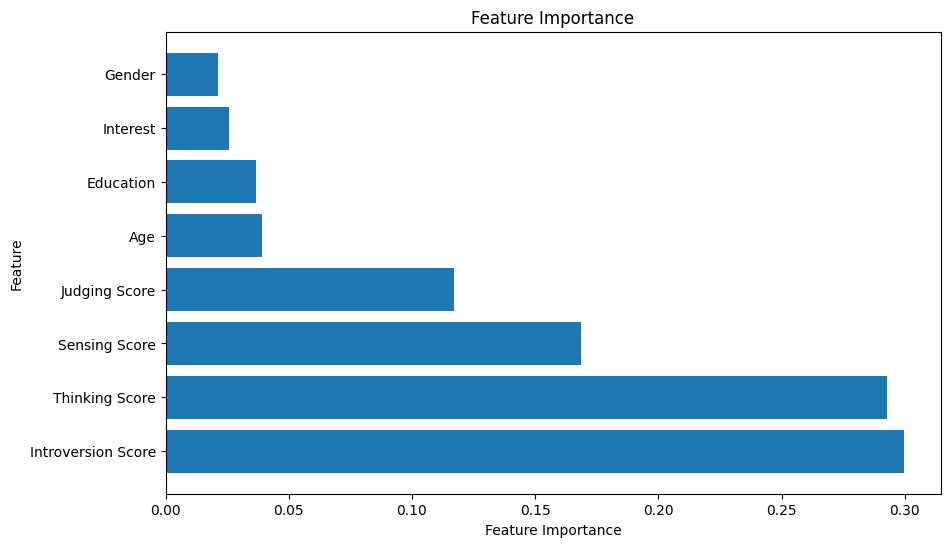

In [21]:
best_rf_classifier_Small = random_Small.best_estimator_
print("Melhores Parâmetros Encontrados Small:")
print(random_Small.best_params_)

analise_dados_modelo(best_rf_classifier_Small,
                     X_train_Small,
                     y_train_Small,
                     X_test_Small,
                     y_test_Small,
                     le_y.inverse_transform(y_train_Small["Personality"].unique()),
                     X_train_Small.columns)


In [12]:
#Salvando Modelos 
joblib.dump(best_rf_classifier_Big, 'best_rf_classifier_Big.pkl')
joblib.dump(best_rf_classifier_Small, 'best_rf_classifier_Small.pkl')

['best_rf_classifier_Small.pkl']